In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

In [2]:
flagFMA = True
flagFB = False

In [3]:
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})
nTurn = 128
nTurnSplit = int(nTurn/64)
errIndex = 0
betx = 1.9065054393933862
alfx = 1.408226172730429
emitx = 6.066503e-6
nCore_y = 8
nCore_z = 4
n_particles = 40000
nx = 100
NL_t = 0.4
NL_c = 0.01
print('singular point = ', NL_c*np.sqrt(betx))
#pipe_radius = 0.013
pipe_radius = 0.01

singular point =  0.013807626296338507


In [4]:
# H1 = 0.04005207 

# 1. Preparation

In [5]:
beam, lattice = impact.readInputFile('test_IOTA.in')

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [6]:
ke   = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

# 2. first 32 turns

In [7]:
indexTBT,TBTdataTmp = impact.readTBT(32,ke,mass,freq)
indexTBT,TBTdataTmp_Inv = impact.readTBT_integral(32)
TBTdataTmp_Inv[:,1,:]=TBTdataTmp_Inv[:,1,:]**2
pDataOut= impact.readParticleData(-200032,ke,mass,freq)
pDataIn = impact.readParticleData(-100032,ke,mass,freq)

(47668, 9)
(47668, 9)


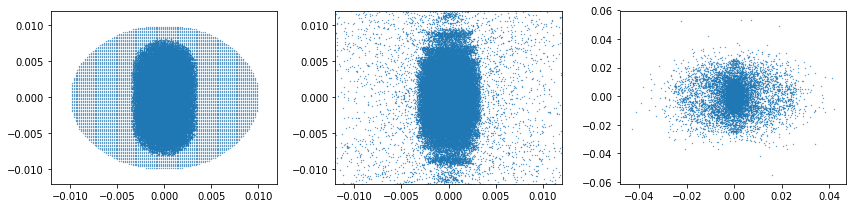

In [8]:
print(pDataIn.shape)
print(pDataOut.shape)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(pDataIn[:,0],pDataIn[:,2],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,2)
plt.scatter(pDataOut[:,0],pDataOut[:,2],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,3)
plt.scatter(pDataOut[:,0],pDataOut[:,2],s=0.1)
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.06,0.06)
plt.tight_layout()

(32, 6, 7668)


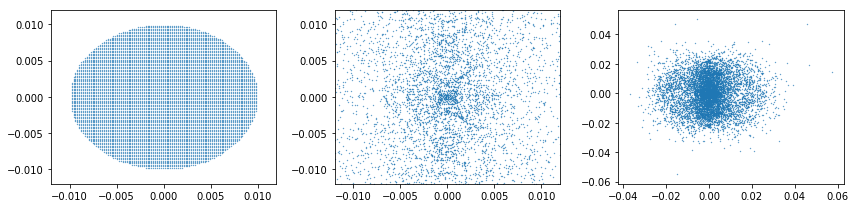

In [9]:
print(TBTdataTmp.shape)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(TBTdataTmp[0,0,:],TBTdataTmp[0,2,:],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,2)
plt.scatter(TBTdataTmp[-1,0,:],TBTdataTmp[-1,2,:],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,3)
plt.scatter(TBTdataTmp[-1,0,:],TBTdataTmp[-1,2,:],s=0.1)
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.06,0.06)
plt.tight_layout()

[2.12E-03 0.00E+00 7.37E-03 0.00E+00 0.00E+00 0.00E+00]


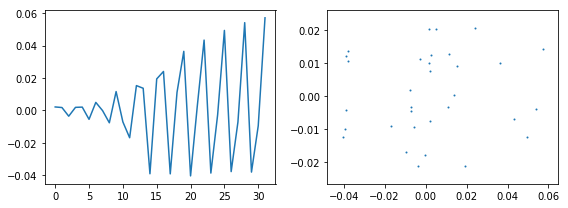

In [10]:
nMax=np.argmax(TBTdataTmp[-1,0,:])
print(TBTdataTmp[0,:,nMax])
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(TBTdataTmp[:,0,nMax])
plt.subplot(1,2,2)
plt.scatter(TBTdataTmp[:,0,nMax],TBTdataTmp[:,2,nMax],s=1)
plt.tight_layout()

# 2. next 32 turns

In [11]:
indexTBT,TBTdataTmp = impact.readTBT(64,ke,mass,freq)
indexTBT,TBTdataTmp_Inv = impact.readTBT_integral(64)
TBTdataTmp_Inv[:,1,:]=TBTdataTmp_Inv[:,1,:]**2
pDataOut= impact.readParticleData(-100064,ke,mass,freq)
pDataIn = impact.readParticleData(-200064,ke,mass,freq)

(47668, 9)
(47668, 9)


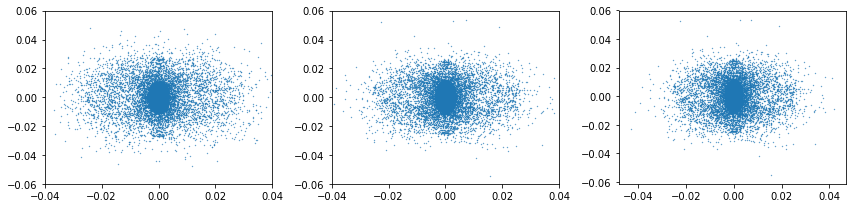

In [12]:
print(pDataIn.shape)
print(pDataOut.shape)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(pDataIn[:,0],pDataIn[:,2],s=0.1)
plt.xlim(-0.04,0.04)
plt.ylim(-0.06,0.06)
plt.subplot(1,3,2)
plt.scatter(pDataOut[:,0],pDataOut[:,2],s=0.1)
plt.xlim(-0.04,0.04)
plt.ylim(-0.06,0.06)
plt.subplot(1,3,3)
plt.scatter(pDataOut[:,0],pDataOut[:,2],s=0.1)
plt.tight_layout()

(32, 6, 7668)


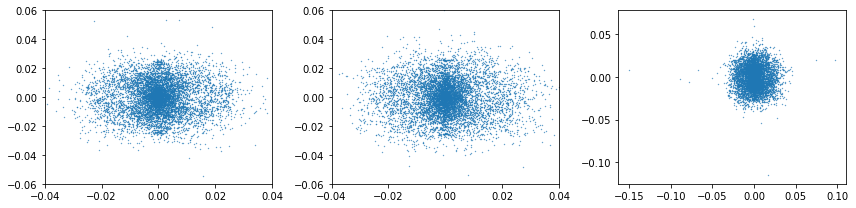

In [13]:
print(TBTdataTmp.shape)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(TBTdataTmp[0,0,:],TBTdataTmp[0,2,:],s=0.1)
plt.xlim(-0.04,0.04)
plt.ylim(-0.06,0.06)
plt.subplot(1,3,2)
plt.scatter(TBTdataTmp[-1,0,:],TBTdataTmp[-1,2,:],s=0.1)
plt.xlim(-0.04,0.04)
plt.ylim(-0.06,0.06)
plt.subplot(1,3,3)
plt.scatter(TBTdataTmp[-1,0,:],TBTdataTmp[-1,2,:],s=0.1)
plt.tight_layout()

[-4.31E-02 1.61E-02 -2.28E-02 2.15E-03 -4.96E-01 0.00E+00]


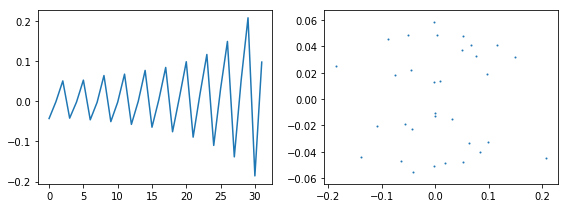

In [14]:
nMax=np.argmax(TBTdataTmp[-1,0,:])
print(TBTdataTmp[0,:,nMax])
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(TBTdataTmp[:,0,nMax])
plt.subplot(1,2,2)
plt.scatter(TBTdataTmp[:,0,nMax],TBTdataTmp[:,2,nMax],s=1)
plt.tight_layout()

In [15]:
if flagFMA:
    iLost,iLive = getArgLostLive(TBTdataTmp,rad=2.0*xmax*np.sqrt(2.0))
    nptLive = len(iLive)
    nptLost = len(iLost)
    TBTdata = TBTdataTmp[:,:,iLive]
    print('TBTdata.shape =',TBTdata.shape)
    print('nptLost,nptLive =',nptLost,nptLive)

NameError: name 'getArgLostLive' is not defined

In [ ]:
if flagFMA:
    indexTBT,TBTdataTmp_Inv = impact.readTBT_integral(errIndex)
    # back to Chad's definition of I2
    TBTdataTmp_Inv[:,1,:]=TBTdataTmp_Inv[:,1,:]**2
    TBTdata_Inv = TBTdataTmp_Inv[:,:,iLive]
    print('TBTdata_Inv.shape',TBTdata_Inv.shape)

In [ ]:
if flagFMA:
    X = TBTdata[:,0,:] - 1j*(betx*TBTdata[:,1,:]+alfx*TBTdata[:,0,:])
    Y = TBTdata[:,2,:] - 1j*(betx*TBTdata[:,3,:]+alfx*TBTdata[:,2,:])
    tuneXbefore= np.zeros([1,nptLive])
    tuneXafter = np.zeros([3,nptLive])
    tuneYbefore= np.zeros([1,nptLive])
    tuneYafter = np.zeros([3,nptLive])
    for i in range(nptLive):
        tuneXbefore[:,i],amp = impact.util.naff(1,X[:nTurn,i],window_id=1)
        tuneXafter [:,i],amp = impact.util.naff(3,X[nTurn+nTurnSplit:,i],window_id=1)
        tuneYbefore[:,i],amp = impact.util.naff(1,Y[:nTurn,i],window_id=1)
        tuneYafter [:,i],amp = impact.util.naff(3,Y[nTurn+nTurnSplit:,i],window_id=1)

In [ ]:
if flagFMA:
    Xdiff = getClosestDiff(tuneXbefore,tuneXafter)
    Ydiff = getClosestDiff(tuneYbefore,tuneYafter)
    Adiff = np.sqrt(Xdiff**2 +Ydiff**2)

    Xstd = np.std(Xdiff)
    Ystd = np.std(Ydiff)
    Astd = np.sqrt(Xstd**2+Ystd**2)

    AdiffLog = np.log10(Adiff+1.0e-6)
    XdiffLog = np.log10(Xdiff+1.0e-6)
    YdiffLog = np.log10(Ydiff+1.0e-6)

    iMaxX = np.argmax(Xdiff)
    iMaxY = np.argmax(Ydiff)
    iMaxA = np.argmax(Adiff)
    iMinX = np.argmin(Xdiff)
    iMinY = np.argmin(Ydiff)
    iMinA = np.argmin(Adiff)

    XdiffSig= 1.0/(1+np.exp(-0.5*(Xdiff-np.mean(Xdiff))/Xstd))
    YdiffSig= 1.0/(1+np.exp(-0.5*(Ydiff-np.mean(Ydiff))/Ystd))
    AdiffSig= 1.0/(1+np.exp(-0.5*(Adiff-np.mean(Adiff))/Astd))